In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [27]:
from elitho.mask_pattern import LinePattern
from elitho import const
from elitho import fourier

mask = LinePattern(cd=80, gap=60, direction="V", field_type="DF")(const.NDIVX, const.NDIVY)

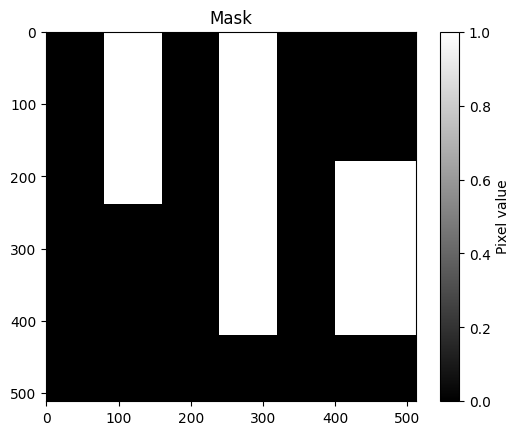

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Mask")
plt.colorbar(label="Pixel value")
plt.show()

In [ ]:

from elitho.intensity import intensity

new_intensity_map = intensity(mask)

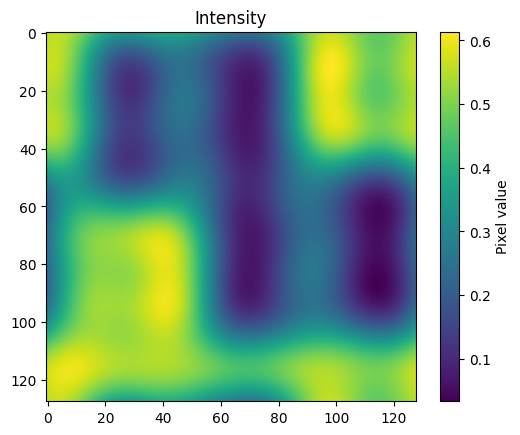

In [ ]:
# from matplotlib import pyplot as plt
# plt.imshow(intensity_map)
# plt.title("Intensity")
# plt.colorbar(label="Pixel value")
# plt.show()

In [ ]:

from elitho.intensity import intensity

intensity_map = intensity(mask)

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(intensity_map)
plt.title("Intensity")
plt.colorbar(label="Pixel value")
plt.show()